# 데이터 수집
dataframe에 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!7z x drive/MyDrive/data.zip -o/drive/MyDrive/blocks_data


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 20208454033 bytes (19 GiB)

Extracting archive: drive/MyDrive/data.zip
 66% 4096 Open              --
Path = drive/MyDrive/data.zip
Type = zip
Physical Size = 20208454033
64-bit = +

  0%      0% 21 - 숫자인식/00/n00/4d_n00_19.jpg                                             0% 29 - 숫자인식/00/n00/4d_n00_27.jpg                                             0% 35 - 숫자인식/00/n00/4d_n00_33.jpg                                             0% 4

In [5]:
import os
import pandas as pd

numbers_path = '/drive/MyDrive/blocks_data/숫자인식/'
alphabets_path = '/drive/MyDrive/blocks_data/알파벳인식/'
free_patterns_path = '/drive/MyDrive/blocks_data/자유패턴/'

number_classes = [str(i) for i in range(10)]
alphabet_classes = [chr(i) for i in range(ord('A'), ord('Z')+1)]

number_folders = {}
for class_name in number_classes:
    number_folders[class_name] = '0' + class_name

data = []

for number, folder_name in number_folders.items():
    n_folder_path = os.path.join(numbers_path, folder_name, 'n'+folder_name)
    r_folder_path = os.path.join(numbers_path, folder_name, 'r_n'+folder_name)
    for file in os.listdir(n_folder_path):
        data.append({
            'image_path': os.path.join(n_folder_path, file),
            'category': 'number',
            'target': number,
            'r': False
        })
    for file in os.listdir(r_folder_path):
        data.append({
            'image_path': os.path.join(r_folder_path, file),
            'category': 'number',
            'target': number,
            'r': True
        })

for letter in alphabet_classes:
    n_folder_path = os.path.join(alphabets_path, letter, letter)
    r_folder_path = os.path.join(alphabets_path, letter, 'r_'+letter)
    for file in os.listdir(n_folder_path):
        data.append({
            'image_path': os.path.join(n_folder_path, file),
            'category': 'alphabet',
            'target': letter,
            'r': False
        })
    for file in os.listdir(r_folder_path):
        data.append({
            'image_path': os.path.join(r_folder_path, file),
            'category': 'alphabet',
            'target': letter,
            'r': True
        })

for root, dirs, files in os.walk(free_patterns_path):
    for file in files:
        data.append({
            'image_path': os.path.join(root, file),
            'category': 'free_pattern',
            'target': 'Free',
            'r': None
        })


df = pd.DataFrame(data)
df.sample(10)

,image_path,category,target,r
491,/drive/MyDrive/blocks_data/숫자인식/04/r_n04/4d_r_...,number,4,True
4028,/drive/MyDrive/blocks_data/자유패턴/10/10_r/10_r07...,free_pattern,Free,None
215,/drive/MyDrive/blocks_data/숫자인식/02/n02/4d_n02_...,number,2,False
2938,/drive/MyDrive/blocks_data/알파벳인식/T/T/4d_al_T_4...,alphabet,T,False
3221,/drive/MyDrive/blocks_data/알파벳인식/W/W/4d_al_W_2...,alphabet,W,False
1811,/drive/MyDrive/blocks_data/알파벳인식/I/I/4d_al_I_0...,alphabet,I,False
2338,/drive/MyDrive/blocks_data/알파벳인식/N/N/4d_al_N_4...,alphabet,N,False
162,/drive/MyDrive/blocks_data/숫자인식/01/r_n01/4d_r_...,number,1,True
1294,/drive/MyDrive/blocks_data/알파벳인식/C/r_C/4d_al_r...,alphabet,C,True
3257,/drive/MyDrive/blocks_data/알파벳인식/W/W/4d_al_W_1...,alphabet,W,False


In [9]:
test_data = []
number_folders = {str(i): 'test_'+str(i) for i in range(10)}

for number, folder_name in number_folders.items():
    for file in os.listdir(os.path.join(numbers_path, '숫자 추가', folder_name)):
        test_data.append({
            'image_path': os.path.join(numbers_path, '숫자 추가', folder_name, file),
            'category': 'number',
            'target': number
        })

alphabet_folders = {chr(i): 'test_'+chr(i) for i in range(ord('A'), ord('Z')+1)}

for letter, folder_name in alphabet_folders.items():
    for file in os.listdir(os.path.join(alphabets_path, '알파벳 추가', folder_name)):
        test_data.append({
            'image_path': os.path.join(alphabets_path, '알파벳 추가', folder_name, file),
            'category': 'alphabet',
            'target': letter
        })

free_test_folders = ['a_g', '10', '40']
for folder in free_test_folders:
  for root, dirs, files in os.walk(os.path.join(free_patterns_path, folder)):
    for file in files:
      test_data.append({
          'image_path': os.path.join(root, file),
          'category': 'free_pattern',
          'target': 'Free'
      })
  df = df.drop(df[df['image_path'].str.contains('/'+folder+'/')].index)

test_df = pd.DataFrame(test_data)
test_df['r'] = test_df['image_path'].str.contains('_r_')==True

test_df.sample(10)

,image_path,category,target,r
1751,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_Z...,alphabet,Z,False
1051,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_L...,alphabet,L,True
1554,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_V...,alphabet,V,False
173,/drive/MyDrive/blocks_data/숫자인식/숫자 추가/test_3/t...,number,3,False
538,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_A...,alphabet,A,False
761,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_F...,alphabet,F,False
582,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_B...,alphabet,B,False
1243,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_O...,alphabet,O,False
1703,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_Y...,alphabet,Y,False
848,/drive/MyDrive/blocks_data/알파벳인식/알파벳 추가/test_G...,alphabet,G,False


In [10]:
test_df.shape, df.shape

((1972, 4), (3970, 4))

# 데이터 전처리
- 이미지 전처리 함수 실행
- 분류 원핫 인코딩

In [11]:
from google.colab import files
src = list(files.upload().values())[0]
open('preprocessing.py','wb').write(src)

Saving preprocessing.py to preprocessing.py


3350

In [12]:
import cv2
import numpy as np
from preprocessing import preprocess_img
from sklearn.model_selection import train_test_split

classes = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)] + ['Free']
X_train, y_train = df['image_path'], df['target']

y_train = pd.get_dummies(y_train)
y_train = y_train[classes]
X_train.shape, y_train.shape

((3970,), (3970, 37))

In [13]:
X_test, y_test = test_df['image_path'], test_df['target']

y_test = pd.get_dummies(y_test)
y_test = y_test[classes]

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((1577,), (395,), (1577, 37), (395, 37))

In [14]:
X_train_224 = X_train.apply(preprocess_img)
X_val_224 = X_val.apply(preprocess_img)
X_test_224 = X_test.apply(preprocess_img)

<Axes: xlabel='target', ylabel='count'>

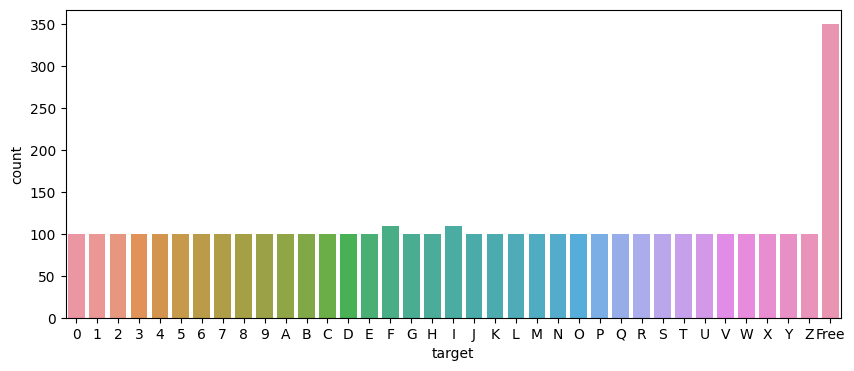

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
sns.countplot(x = df['target'])

# 모델 선택

### VGG16

In [16]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
base_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [17]:
X_train_224_vgg = np.stack(X_train_224.values)
X_train_224_vgg = preprocess_input(X_train_224_vgg)
X_train_224_vgg[0]

array([[[-103.4644902 , -116.26527451, -123.11137255],
        [-103.339     , -116.13586275, -122.99764706],
        [-103.23311765, -116.00645098, -122.93098039],
        ...,
        [-103.09586275, -115.89664706, -122.82117647],
        [-103.08801961, -115.90056863, -122.82117647],
        [-103.0762549 , -115.90056863, -122.81333333]],

       [[-103.18998039, -115.979     , -122.87607843],
        [-103.11939216, -115.9162549 , -122.82509804],
        [-103.12331373, -115.92409804, -122.82509804],
        ...,
        [-103.09978431, -115.89664706, -122.80941176],
        [-103.09978431, -115.89272549, -122.80156863],
        [-103.09978431, -115.88880392, -122.81333333]],

       [[-103.37037255, -116.15939216, -123.05254902],
        [-103.12331373, -115.92017647, -122.82901961],
        [-103.12331373, -115.92409804, -122.82509804],
        ...,
        [-103.09194118, -115.89664706, -122.80941176],
        [-103.09586275, -115.89272549, -122.8054902 ],
        [-103.09978431

In [18]:
X_val_224_vgg = np.stack(X_val_224.values)
X_val_224_vgg = preprocess_input(X_val_224_vgg)

X_train_224_vgg = np.stack(X_train_224.values)
X_train_224_vgg = preprocess_input(X_train_224_vgg)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(37, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_224_vgg, y_train, validation_data=(X_val_224_vgg, y_val), epochs=20, batch_size=32)

Epoch 1/20
125/125 [==============================] - 23s 93ms/step - loss: 3.6909 - accuracy: 0.0579 - val_loss: 3.6053 - val_accuracy: 0.0869
Epoch 2/20
125/125 [==============================] - 7s 58ms/step - loss: 3.6028 - accuracy: 0.0882 - val_loss: 3.5999 - val_accuracy: 0.0869
Epoch 3/20
125/125 [==============================] - 7s 59ms/step - loss: 3.5973 - accuracy: 0.0882 - val_loss: 3.5948 - val_accuracy: 0.0869
Epoch 4/20
125/125 [==============================] - 7s 59ms/step - loss: 3.5925 - accuracy: 0.0882 - val_loss: 3.5904 - val_accuracy: 0.0869
Epoch 5/20
125/125 [==============================] - 7s 59ms/step - loss: 3.5878 - accuracy: 0.0882 - val_loss: 3.5862 - val_accuracy: 0.0869
Epoch 6/20
125/125 [==============================] - 7s 59ms/step - loss: 3.5841 - accuracy: 0.0882 - val_loss: 3.5828 - val_accuracy: 0.0869
Epoch 7/20
125/125 [==============================] - 7s 59ms/step - loss: 3.5808 - accuracy: 0.0882 - val_loss: 3.5798 - val_accuracy: 0.086

In [21]:
model.fit(np.stack(X_train_224.values), y_train, validation_data=(np.stack(X_val_224.values), y_val), epochs=20, batch_size=32)

Epoch 1/20
125/125 [==============================] - 10s 80ms/step - loss: 3.3590 - accuracy: 0.0950 - val_loss: 3.3948 - val_accuracy: 0.1122
Epoch 2/20
125/125 [==============================] - 7s 59ms/step - loss: 3.3562 - accuracy: 0.0982 - val_loss: 3.3957 - val_accuracy: 0.1122
Epoch 3/20
125/125 [==============================] - 7s 59ms/step - loss: 3.3561 - accuracy: 0.0982 - val_loss: 3.3550 - val_accuracy: 0.1122
Epoch 4/20
125/125 [==============================] - 7s 60ms/step - loss: 3.3624 - accuracy: 0.0965 - val_loss: 3.3667 - val_accuracy: 0.1122
Epoch 5/20
125/125 [==============================] - 7s 60ms/step - loss: 3.3520 - accuracy: 0.0972 - val_loss: 3.3713 - val_accuracy: 0.1122
Epoch 6/20
125/125 [==============================] - 7s 60ms/step - loss: 3.3537 - accuracy: 0.0967 - val_loss: 3.3746 - val_accuracy: 0.1122
Epoch 7/20
125/125 [==============================] - 7s 60ms/step - loss: 3.3556 - accuracy: 0.0982 - val_loss: 3.3777 - val_accuracy: 0.112

In [ ]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(37, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
import cv2
X_train_96 = X_train_224.apply(lambda x: cv2.resize(x, (96, 96)))
X_val_96 = X_val_224.apply(lambda x: cv2.resize(x, (96, 96)))

In [33]:
model.fit(preprocess_input(np.stack(X_train_96.values)), y_train, validation_data=(preprocess_input(np.stack(X_val_96.values)), y_val), epochs=50, batch_size=32)

Epoch 1/50
125/125 [==============================] - 2s 14ms/step - loss: 9.8661 - accuracy: 0.0662 - val_loss: 5.9594 - val_accuracy: 0.1097
Epoch 2/50
125/125 [==============================] - 1s 11ms/step - loss: 9.3447 - accuracy: 0.0713 - val_loss: 5.5827 - val_accuracy: 0.1091
Epoch 3/50
125/125 [==============================] - 1s 10ms/step - loss: 9.0196 - accuracy: 0.0723 - val_loss: 5.7227 - val_accuracy: 0.0938
Epoch 4/50
125/125 [==============================] - 1s 10ms/step - loss: 8.5326 - accuracy: 0.0741 - val_loss: 5.6784 - val_accuracy: 0.1034
Epoch 5/50
125/125 [==============================] - 1s 10ms/step - loss: 8.0450 - accuracy: 0.0786 - val_loss: 5.1782 - val_accuracy: 0.1091
Epoch 6/50
125/125 [==============================] - 1s 10ms/step - loss: 7.6406 - accuracy: 0.0819 - val_loss: 5.1035 - val_accuracy: 0.1110
Epoch 7/50
125/125 [==============================] - 1s 10ms/step - loss: 7.5239 - accuracy: 0.0841 - val_loss: 4.4556 - val_accuracy: 0.1097

In [37]:
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(37, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(preprocess_input(np.stack(X_train_224.values)), y_train, validation_data=(preprocess_input(np.stack(X_val_224.values)), y_val), epochs=50, batch_size=32)

Epoch 1/50
125/125 [==============================] - 17s 94ms/step - loss: 4.0585 - accuracy: 0.0917 - val_loss: 3.3748 - val_accuracy: 0.1122
Epoch 2/50
125/125 [==============================] - 4s 29ms/step - loss: 3.2973 - accuracy: 0.1088 - val_loss: 3.3969 - val_accuracy: 0.1122
Epoch 3/50
125/125 [==============================] - 4s 29ms/step - loss: 3.2934 - accuracy: 0.1113 - val_loss: 3.4309 - val_accuracy: 0.1129
Epoch 4/50
125/125 [==============================] - 4s 29ms/step - loss: 3.2947 - accuracy: 0.1098 - val_loss: 3.4694 - val_accuracy: 0.1084
Epoch 5/50
125/125 [==============================] - 4s 30ms/step - loss: 3.2922 - accuracy: 0.1149 - val_loss: 3.4802 - val_accuracy: 0.1122
Epoch 6/50
125/125 [==============================] - 4s 29ms/step - loss: 3.2848 - accuracy: 0.1139 - val_loss: 3.5174 - val_accuracy: 0.1122
Epoch 7/50
125/125 [==============================] - 4s 29ms/step - loss: 3.2862 - accuracy: 0.1103 - val_loss: 3.4648 - val_accuracy: 0.112

KeyboardInterrupt: ignored

In [39]:
from keras.optimizers import Adam

base_model.trainable = True
model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(preprocess_input(np.stack(X_train_224.values)), y_train, validation_data=(preprocess_input(np.stack(X_val_224.values)), y_val), epochs=50, batch_size=32)